In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [76]:
df=pd.read_csv('Binance.csv')

In [77]:
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2017-11-06 03:54:00,1.5,1.50,1.5,1.50,10.83,2017-11-06 03:54:59.999,16.245,2.0,10.83,16.245,0.0
1,2017-11-06 03:55:00,1.3,1.30,1.3,1.30,1.00,2017-11-06 03:55:59.999,1.300,1.0,0.00,0.000,0.0
2,2017-11-06 03:56:00,1.3,1.30,0.5,0.50,19.00,2017-11-06 03:56:59.999,24.356,6.0,0.33,0.429,0.0
3,2017-11-06 03:57:00,0.5,0.61,0.5,0.61,253.00,2017-11-06 03:57:59.999,151.660,17.0,0.00,0.000,0.0
4,2017-11-06 03:58:00,1.1,1.10,1.1,1.10,85.00,2017-11-06 03:58:59.999,93.500,1.0,0.00,0.000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3697462 entries, 0 to 3697461
Data columns (total 12 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Open time                     object 
 1   Open                          float64
 2   High                          float64
 3   Low                           float64
 4   Close                         float64
 5   Volume                        float64
 6   Close time                    object 
 7   Quote asset volume            float64
 8   Number of trades              float64
 9   Taker buy base asset volume   float64
 10  Taker buy quote asset volume  float64
 11  Ignore                        float64
dtypes: float64(10), object(2)
memory usage: 338.5+ MB


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
count,3.697462e+06,3.697462e+06,3.697462e+06,3.697462e+06,3.697462e+06,3.697462e+06,3.697462e+06,3.697462e+06,3.697462e+06,3697462.0
mean,2.118886e+02,2.120212e+02,2.117419e+02,2.118860e+02,1.172512e+03,1.606726e+05,2.315655e+02,5.978417e+02,8.092693e+04,0.0
std,2.051216e+02,2.052433e+02,2.049892e+02,2.051194e+02,2.285988e+03,4.584559e+05,4.581678e+02,1.257464e+03,2.371912e+05,0.0
min,5.000000e-01,6.100000e-01,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.649140e+01,1.650000e+01,1.648030e+01,1.649132e+01,1.468632e+02,1.124387e+04,3.500000e+01,5.406200e+01,4.443624e+03,0.0
50%,2.248000e+02,2.250000e+02,2.246113e+02,2.248000e+02,4.624100e+02,3.821490e+04,1.000000e+02,2.077700e+02,1.748244e+04,0.0
75%,3.350000e+02,3.352300e+02,3.347000e+02,3.350000e+02,1.289041e+03,1.269819e+05,2.430000e+02,6.323100e+02,6.344863e+04,0.0
max,7.208000e+02,7.218000e+02,7.203000e+02,7.208000e+02,1.809143e+05,5.508505e+07,6.355900e+04,1.044994e+05,3.367680e+07,0.0


In [7]:
df.isnull().sum()

Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Ignore'],
      dtype='object')

In [12]:
df.dtypes

Open time                        object
Open                            float64
High                            float64
Low                             float64
Close                           float64
Volume                          float64
Close time                       object
Quote asset volume              float64
Number of trades                float64
Taker buy base asset volume     float64
Taker buy quote asset volume    float64
Ignore                          float64
dtype: object

In [78]:
df['Open time'] = pd.to_datetime(df['Open time'])
df['Close time'] = pd.to_datetime(df['Close time'])



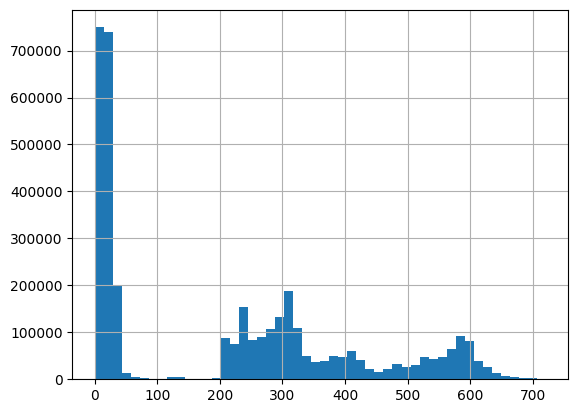

In [21]:
# Use histograms to understand data distribution.
df['Close'].hist(bins=50)
plt.show()

## Visualize Time Series Data

<Axes: title={'center': 'Closing Price Over Time'}, xlabel='Close time'>

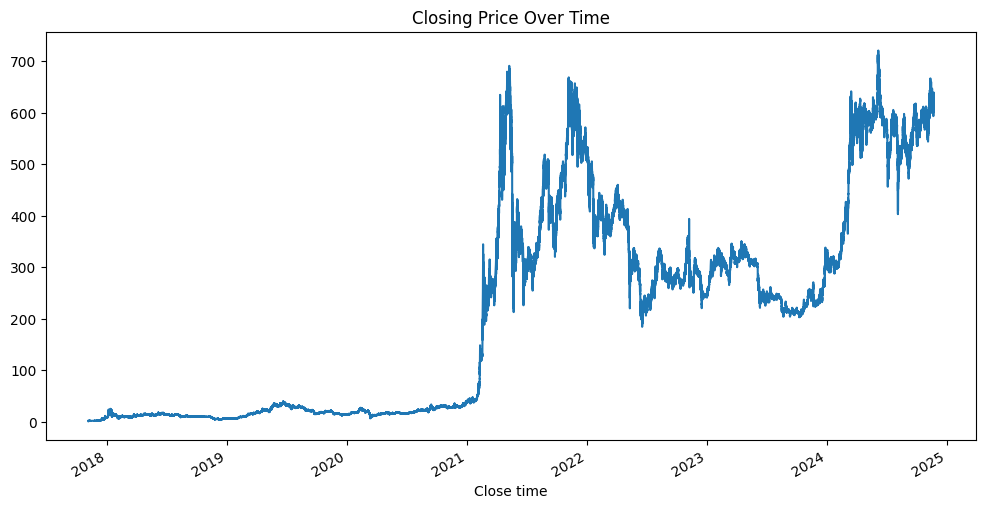

In [23]:
# Plot closing prices over time:
df.set_index('Close time')['Close'].plot(figsize=(12, 6), title='Closing Price Over Time')


<Axes: title={'center': 'Trading Volume Over Time'}, xlabel='Open time'>

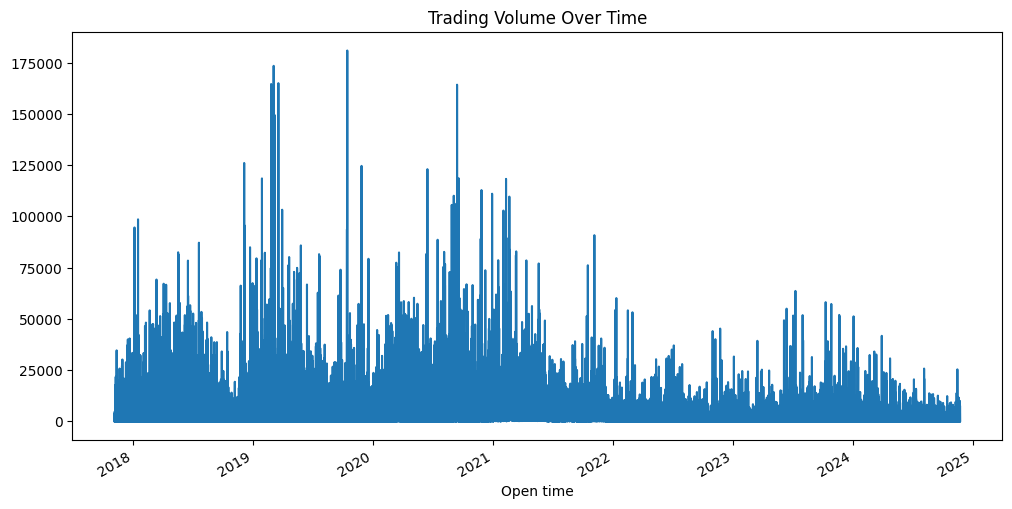

In [25]:
# Plot trading volume:
df.set_index('Open time')['Volume'].plot(figsize=(12, 6), title='Trading Volume Over Time')


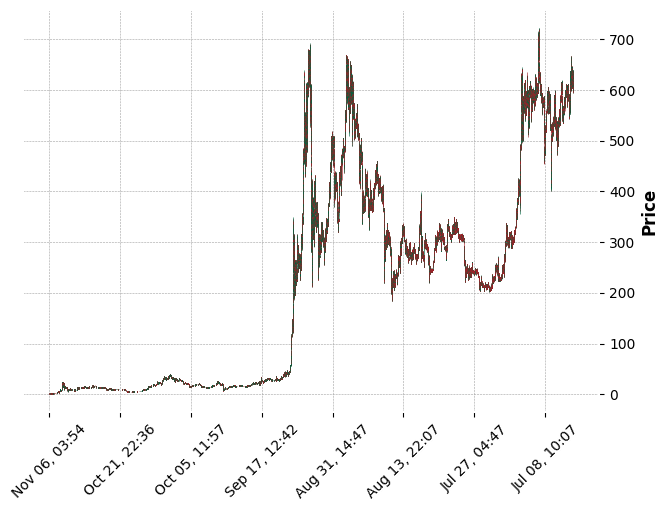

In [27]:
# Use candlestick charts for OHLC data (with libraries like mplfinance):
import mplfinance as mpf
mpf.plot(df.set_index('Open time'), type='candle', style='charles')

In [ ]:
# Compute correlation matrix:
df.corr()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Open time,1.000000,0.805024,0.804898,0.805136,0.805016,-0.221842,1.000000,0.111663,0.198635,-0.211295,0.106782,NaN
Open,0.805024,1.000000,0.999999,0.999999,0.999999,-0.187144,0.805024,0.282018,0.368336,-0.177428,0.273222,NaN
High,0.804898,0.999999,1.000000,0.999998,0.999999,-0.186762,0.804898,0.282698,0.368987,-0.177025,0.273985,NaN
Low,0.805136,0.999999,0.999998,1.000000,0.999999,-0.187573,0.805136,0.281240,0.367570,-0.177741,0.272616,NaN
Close,0.805016,0.999999,0.999999,0.999999,1.000000,-0.187159,0.805016,0.281988,0.368290,-0.177332,0.273398,NaN
Volume,-0.221842,-0.187144,-0.186762,-0.187573,-0.187159,1.000000,-0.221842,0.503283,0.451093,0.872399,0.478358,NaN
Close time,1.000000,0.805024,0.804898,0.805136,0.805016,-0.221842,1.000000,0.111663,0.198635,-0.211295,0.106782,NaN
Quote asset volume,0.111663,0.282018,0.282698,0.281240,0.281988,0.503283,0.111663,1.000000,0.892520,0.447791,0.958265,NaN
Number of trades,0.198635,0.368336,0.368987,0.367570,0.368290,0.451093,0.198635,0.892520,1.000000,0.397448,0.850841,NaN
Taker buy base asset volume,-0.211295,-0.177428,-0.177025,-0.177741,-0.177332,0.872399,-0.211295,0.447791,0.397448,1.000000,0.484979,NaN


<Axes: >

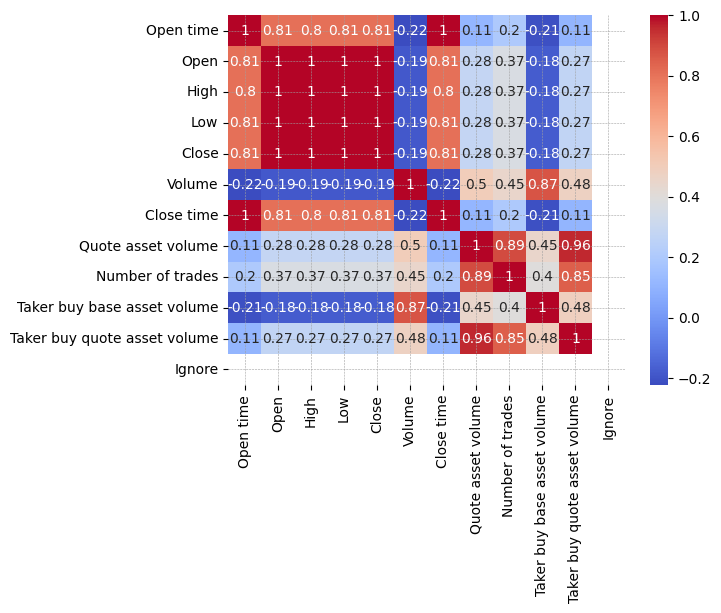

In [29]:
# Visualize correlations with a heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Outlier Detection

<Axes: >

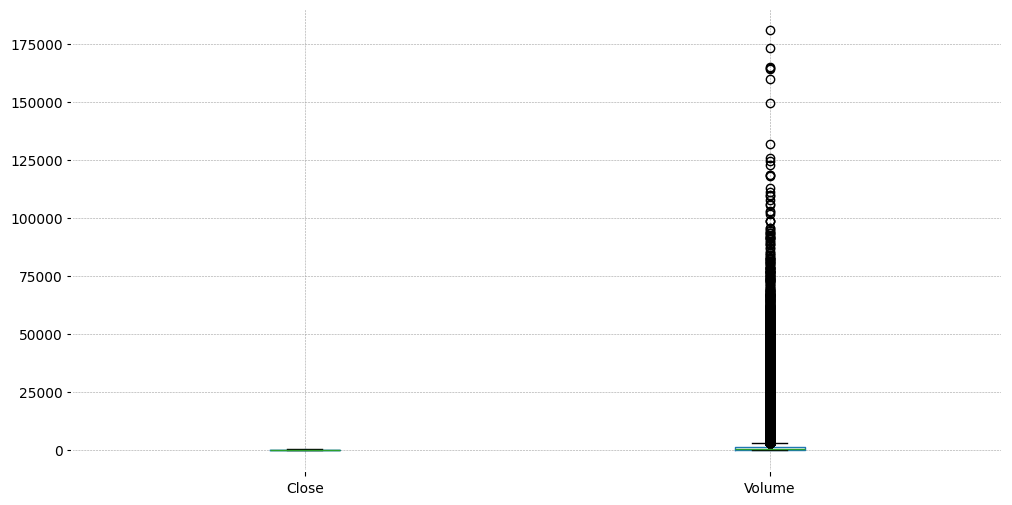

In [30]:
# Box plot
df[['Close', 'Volume']].boxplot(figsize=(12, 6))

<Axes: xlabel='Volume', ylabel='Close'>

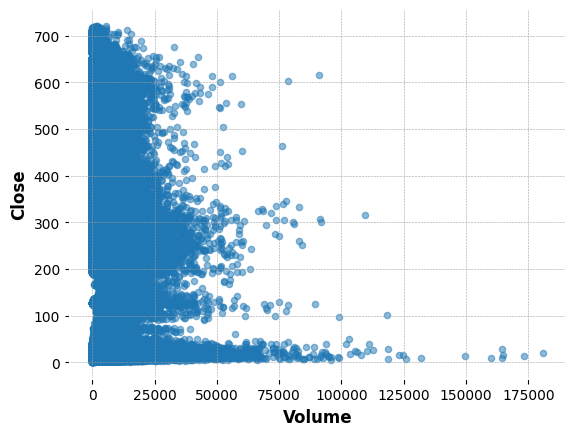

In [31]:
# scatter plot
df.plot.scatter(x='Volume', y='Close', alpha=0.5)


<Axes: >

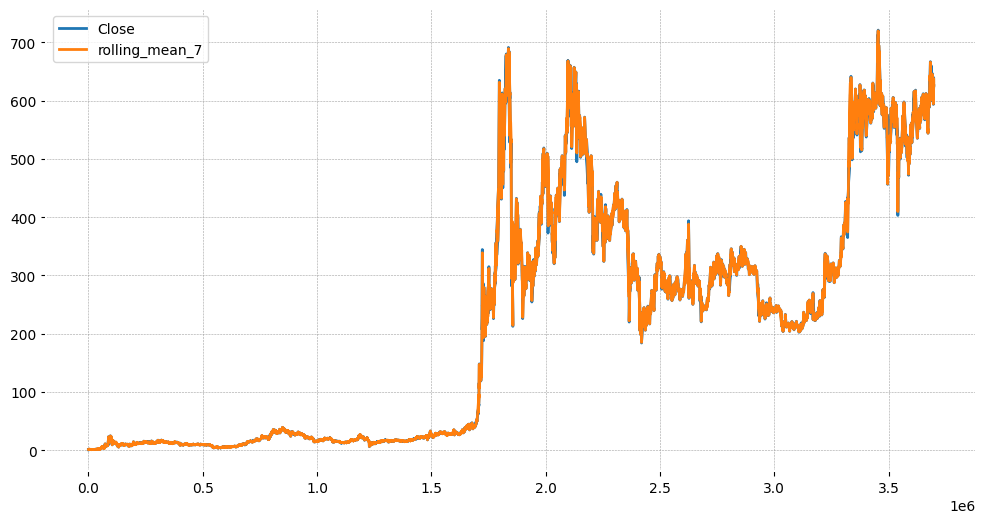

In [84]:
# Rolling averages:
df['rolling_mean_7'] = df['Close'].rolling(window=7).mean()
df[['Close', 'rolling_mean_7']].plot(figsize=(12, 6))

In [42]:
# Seasonality
df['day_of_week'] = df['Open time'].dt.day_name()
print(df.groupby('day_of_week')['Volume'].mean())

day_of_week
Friday       1200.121650
Monday       1190.806262
Saturday     1029.296918
Sunday       1031.249830
Thursday     1214.239099
Tuesday      1278.126161
Wednesday    1263.659166
Name: Volume, dtype: float64


## Categorize Price Movements

In [46]:
# Calculate percentage change:
df['price_change_pct'] = df['Close'].pct_change() * 100


In [ ]:
# Classify trends ( hightrend, lowtrend, open)
df['trend'] = df['price_change_pct'].apply(lambda x: 'High' if x > 0 else ('Low' if x < 0 else 'Open'))
print(df['trend'].value_counts())


trend
High    1615184
Low     1606038
Open     476240
Name: count, dtype: int64


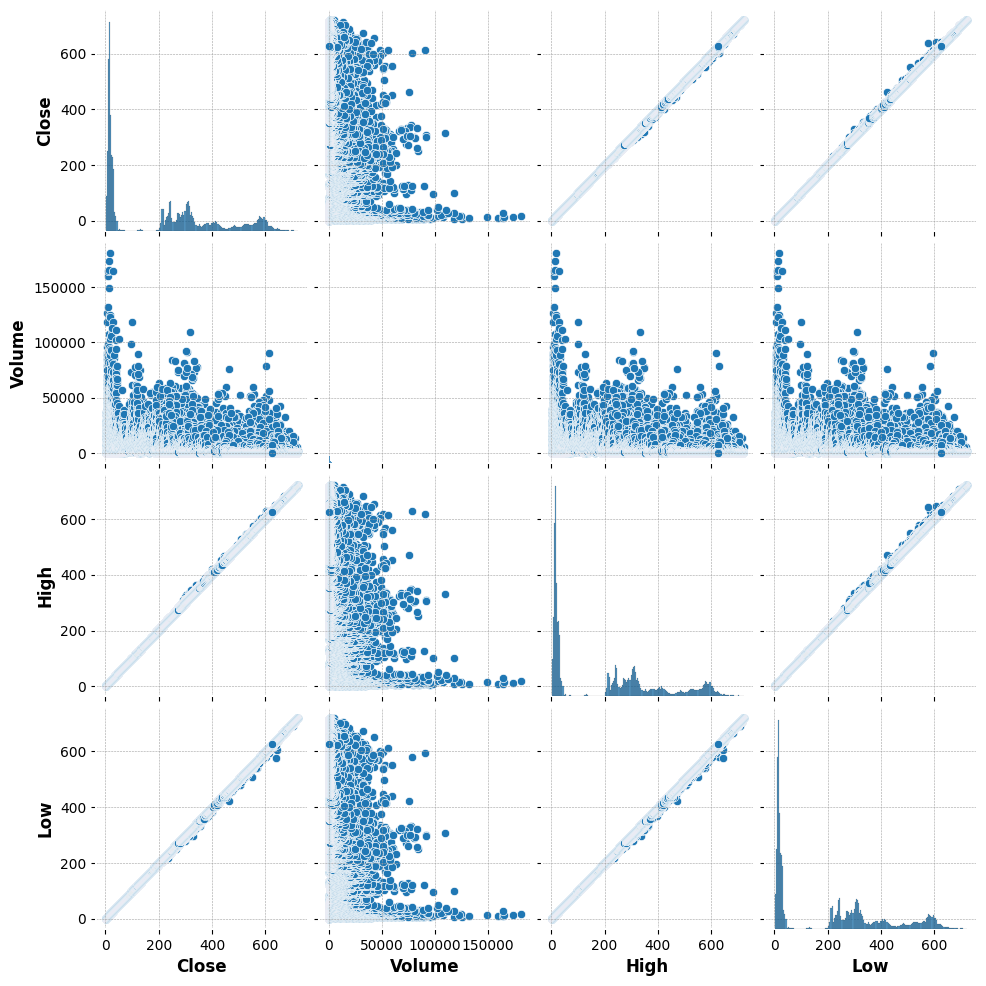

In [49]:
# Pair plots to explore relationships:
sns.pairplot(df[['Close', 'Volume', 'High', 'Low']])


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

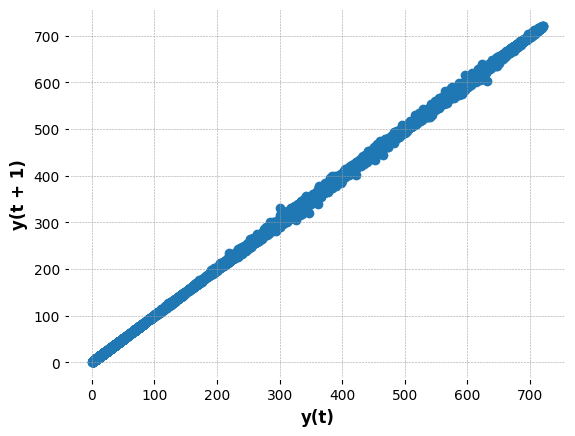

In [50]:
# Lag plots to check autocorrelation:
from pandas.plotting import lag_plot
lag_plot(df['Close'])


<Axes: >

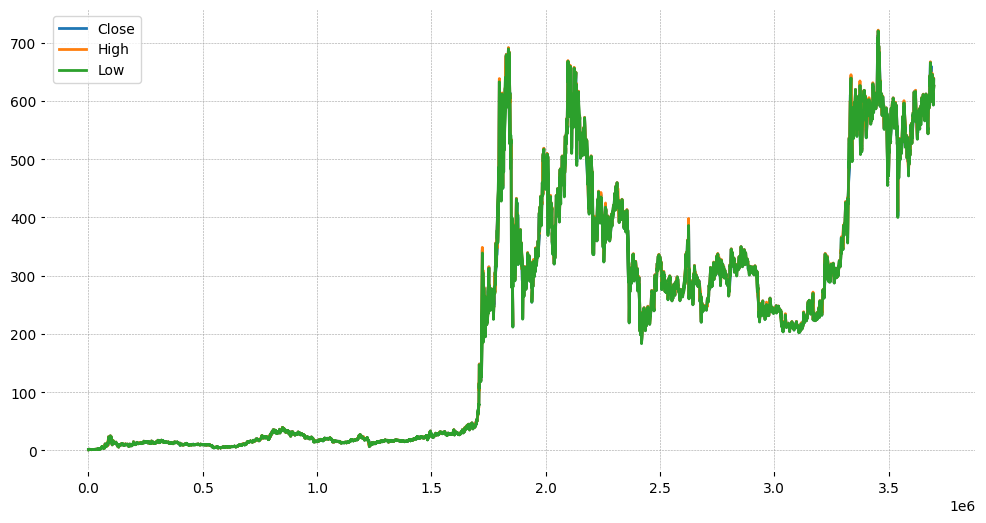

In [83]:
# Volatility analysis using Bollinger Bands:
df['rolling_std'] = df['Close'].rolling(window=20).std()
df['upper_band'] = df['rolling_mean_7'] + (df['rolling_std'] * 2)
df['lower_band'] = df['rolling_mean_7'] - (df['rolling_std'] * 2)
df[['Close', 'High', 'Low']].plot(figsize=(12, 6))
